## Observations and Insights 

1. What I find the most interesting is the boxplots showing the final tumor volumes by drug. I think this is one of the most significant and useful visualization of data in this set.
2. On that note, I don't believe this data set to be accurately measuring each drug because it is measuring the final tumor volume with no regard of the size of the original tumor, hence it would be more useful to plot the change in volume throughout dosing of drug. *EDIT* I decided to just do the plot of the change in volume rather than end volume, ended up realizing the other set was just as helpful as all tumors started at 45 mm3 meaning it was controlled so I didn't need to worry about that variable. With that my boxplot really shows the data but in an inverse way (sometimes its nice to see the top performers at the top)
3. Scatterplots work best with more varying data, the fact that we only had 9 unique weights for the weight makes the scatterplot more difficult to analyze.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata)
# print(study_results)
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
unique_mice = len(mouse_df['Mouse ID'].unique())
print(f'There are {unique_mice} different mice in the study comprising of {len(mouse_df)} data points')

There are 249 different mice in the study comprising of 1893 data points


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = mouse_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
unique_mice = len(clean_df['Mouse ID'].unique())
print(f'There are {unique_mice} different mice in the study comprising of {len(clean_df)} data points')

There are 249 different mice in the study comprising of 1888 data points


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_values = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_values

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
## Here I realize that I was supposed to drop the entire mouse ID rather than just deleting one of each duplicate value

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Showing the original duplicated rows
clean_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']
unique_mice = len(clean_df['Mouse ID'].unique())
print(f'There are {unique_mice} different mice in the study comprising of {len(clean_df)} data points')

#Here I can see how all of the 5 duplicate values that were removed all were from one mouse

There are 248 different mice in the study comprising of 1880 data points


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_df = clean_df.groupby(['Drug Regimen'])
drugs_regimen = clean_df['Drug Regimen'].unique()

grouped_df.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = grouped_df['Tumor Volume (mm3)']
mean = tumor.mean()
median = tumor.median()
var = tumor.var()
std = tumor.std()
sem = tumor.sem()
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = pd.DataFrame({'Mean': mean,
                             'Median': median,
                             'Variance': var,
                             'Standard Deviation': std,
                             'Standard Error of the Mean': sem})
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

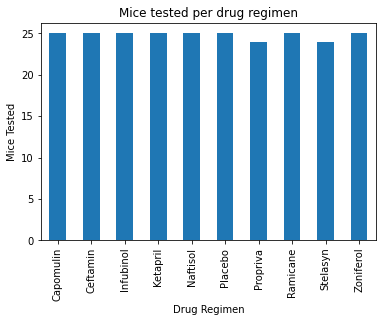

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# print(grouped_df['Drug Regimen'])
drug_pd = grouped_df['Mouse ID'].nunique().plot(kind='bar', title='Mice tested per drug regimen', ylabel='Mice Tested')
# drug_pd.xticks(rotation=45)
# drug_pd.xlabel('Drug Regimen')
# drug_pd.ylabel('Mice tested')

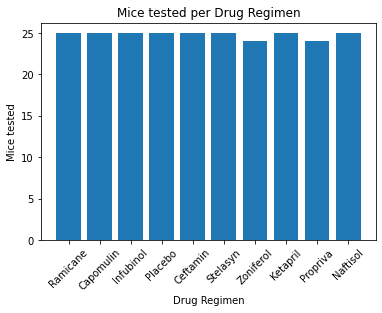

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_per_regimen = grouped_df['Mouse ID'].nunique()
plt.bar(drugs_regimen, mice_per_regimen)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Mice tested')
plt.title('Mice tested per Drug Regimen')
plt.show()

<AxesSubplot:>

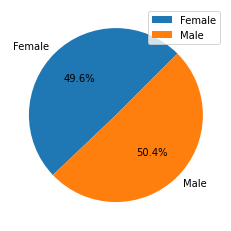

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df.groupby(['Sex'])
gender_counts = gender_df['Mouse ID'].nunique()
gender_counts.plot(kind='pie', startangle=45, legend = True, autopct="%1.1f%%", ylabel='')

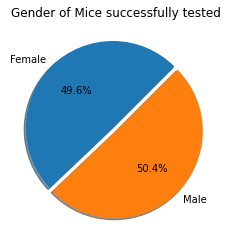

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, explode = [.05,0], autopct="%1.1f%%", startangle=45, shadow = True, labels=['Female','Male'])
plt.title('Gender of Mice successfully tested')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
drug_and_mouse = clean_df.groupby(['Drug Regimen','Mouse ID'])
# Start by getting the last (greatest) timepoint for each mouse
greatest = drug_and_mouse['Tumor Volume (mm3)'].last()
merged = clean_df.merge(greatest, on='Mouse ID')
merged4a = merged[merged['Drug Regimen'].isin(drugs)]
merged4 = merged4a.drop_duplicates(['Mouse ID'], keep='last')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged4 = merged4.drop(['Mouse ID','Sex','Age_months','Weight (g)','Tumor Volume (mm3)_x','Metastatic Sites','Timepoint'], axis=1)
capomulin = merged4.loc[merged4['Drug Regimen'] =='Capomulin']
ramicane = merged4.loc[merged4['Drug Regimen'] =='Ramicane']
infubinol = merged4.loc[merged4['Drug Regimen'] =='Infubinol']
ceftamin = merged4.loc[merged4['Drug Regimen'] =='Ceftamin']
capomulin.columns = "Drug","Tumor"
ramicane.columns = "Drug","Tumor"
infubinol.columns = "Drug","Tumor"
ceftamin.columns = "Drug","Tumor"

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

quartile = capomulin.Tumor.quantile([.25,.5,.75])
iqr = quartile[.75] - quartile[.25]
print(f'Capomulin Results:')
print("-------------------------")
print(f'Lower Quartile: {round(quartile[.25],3)}')
print(f'Upper Quartile: {round(quartile[.75],3)}')
print(f'Interquartile range: {round(iqr,3)}')
print(f'Values below {round(quartile[.25] - (1.5*iqr),3)} or above {round(quartile[.75] + (1.5*iqr),3)} are likely outliers')
print("==========================")

quartile = ramicane.Tumor.quantile([.25,.5,.75])
iqr = quartile[.75] - quartile[.25]
print(f'Ramicane Results:')
print("-------------------------")
print(f'Lower Quartile: {round(quartile[.25],3)}')
print(f'Upper Quartile: {round(quartile[.75],3)}')
print(f'Interquartile range: {round(iqr,3)}')
print(f'Values below {round(quartile[.25] - (1.5*iqr),3)} or above {round(quartile[.75] + (1.5*iqr),3)} are likely outliers')
print("==========================")

quartile = infubinol.Tumor.quantile([.25,.5,.75])
iqr = quartile[.75] - quartile[.25]
print(f'Infubinol Results:')
print("-------------------------")
print(f'Lower Quartile: {round(quartile[.25],3)}')
print(f'Upper Quartile: {round(quartile[.75],3)}')
print(f'Interquartile range: {round(iqr,3)}')
print(f'Values below {round(quartile[.25] - (1.5*iqr),3)} or above {round(quartile[.75] + (1.5*iqr),3)} are likely outliers')
print("==========================")

quartile = ceftamin.Tumor.quantile([.25,.5,.75])
iqr = quartile[.75] - quartile[.25]
print(f'Ceftamin Results:')
print("-------------------------")
print(f'Lower Quartile: {round(quartile[.25],3)}')
print(f'Upper Quartile: {round(quartile[.75],3)}')
print(f'Interquartile range: {round(iqr,3)}')
print(f'Values below {round(quartile[.25] - (1.5*iqr),3)} or above {round(quartile[.75] + (1.5*iqr),3)} are likely outliers')
print("==========================")
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin Results:
-------------------------
Lower Quartile: 32.377
Upper Quartile: 40.159
Interquartile range: 7.782
Values below 20.705 or above 51.832 are likely outliers
Ramicane Results:
-------------------------
Lower Quartile: 31.56
Upper Quartile: 40.659
Interquartile range: 9.099
Values below 17.913 or above 54.307 are likely outliers
Infubinol Results:
-------------------------
Lower Quartile: 54.049
Upper Quartile: 65.526
Interquartile range: 11.477
Values below 36.833 or above 82.741 are likely outliers
Ceftamin Results:
-------------------------
Lower Quartile: 48.722
Upper Quartile: 64.3
Interquartile range: 15.578
Values below 25.355 or above 87.666 are likely outliers


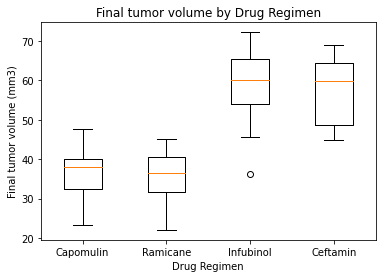

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin.Tumor, ramicane.Tumor, infubinol.Tumor, ceftamin.Tumor])
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final tumor volume by Drug Regimen')
plt.xticks([1,2,3,4], drugs) 
plt.show()

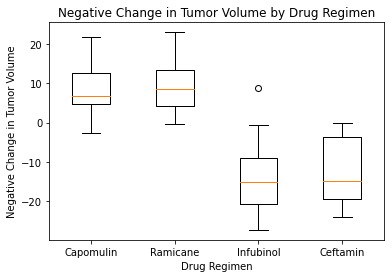

In [52]:
# I originally didn't find that graph useful because I didn't realize that the tumors all started
# at 45 mm3 so I decided to graph the negative change achieved by each drug. Yes this is admittedly
# more difficult to understand but with a dataset without that control this would be more helpful.

group1 = merged4a.groupby('Mouse ID')
change = group1['Tumor Volume (mm3)_x'].first() - group1['Tumor Volume (mm3)_x'].last()
drugg = group1['Drug Regimen'].first()
bxplot_df = pd.DataFrame({'Drug Regimen': drugg,
                         'Change in Tumor Size': change})
capomulin2 = bxplot_df.loc[bxplot_df['Drug Regimen'] == 'Capomulin']
ramicane2 = bxplot_df.loc[bxplot_df['Drug Regimen'] == 'Ramicane']
infubinol2 = bxplot_df.loc[bxplot_df['Drug Regimen'] == 'Infubinol']
ceftamin2 = bxplot_df.loc[bxplot_df['Drug Regimen'] == 'Ceftamin']
# capomulin2
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin2['Change in Tumor Size'],ramicane2['Change in Tumor Size'],
             infubinol2['Change in Tumor Size'],ceftamin2['Change in Tumor Size']])

ax1.set_ylabel('Negative Change in Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Negative Change in Tumor Volume by Drug Regimen')
plt.xticks([1,2,3,4], drugs) 
plt.show()
# group1['Change'] = change
# merged4a['Change'] = change

## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor volume over time for s185'}, xlabel='Timepoint', ylabel='Tumor volume'>

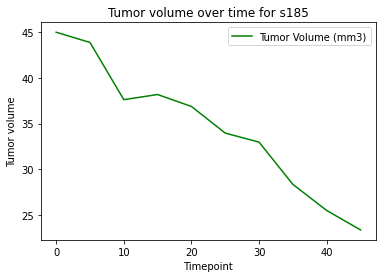

In [190]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 's185'
one_mouse = clean_df.loc[clean_df['Mouse ID'] == mouse_id]
one_mouse = one_mouse.drop(['Sex','Age_months','Weight (g)', 'Metastatic Sites'], axis = 1)
one_mouse.plot(kind='line', x = 'Timepoint', y = 'Tumor Volume (mm3)', 
               title=f'Tumor volume over time for {mouse_id}', ylabel='Tumor volume',c='green')


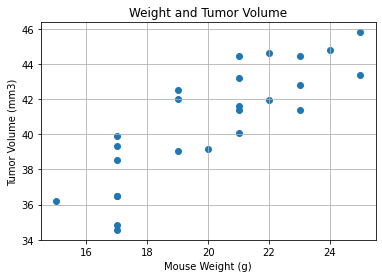

In [194]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tum_weight = clean_df
tum_weight = tum_weight.loc[tum_weight['Drug Regimen'] == 'Capomulin']
tum_weight_grouped = tum_weight.groupby('Mouse ID')
weight = tum_weight_grouped['Weight (g)'].last()
tumor_vol = tum_weight_grouped['Tumor Volume (mm3)'].mean()
plt.scatter(x=weight, y = tumor_vol)
plt.grid()
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.title('Weight and Tumor Volume')
plt.show()

## Correlation and Regression

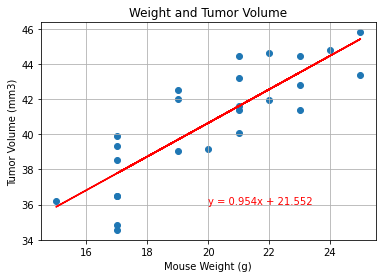

In [196]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, inter, rval, pval, stderr) = linregress(weight,tumor_vol)
equation_thing = weight * slope + inter
equation_string = f"y = {round(slope,3)}x + {round(inter,3)}"
plt.scatter(x=weight, y = tumor_vol)
plt.plot(weight,equation_thing,'r-')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.title('Weight and Tumor Volume')
plt.text(20,36,equation_string,c='red')
plt.grid()
plt.show()